In [1]:
from code.adjustable_efficient_diagonal import *
from qiskit.tools.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

Implementation of a diagonal unitary $\hat{U}_f$ with $f(x)=\sin(2\pi x)$ using ancilla qubits for parallelization and a reduced number of Walsh operators for approximation:
$$\hat{U}_f=\sum_x e^{if(x)}|x><x|$$

In [2]:
# We define the function
def f(x):
    return np.sin(2*np.pi*x)

In [3]:
# Number of working qubits
n = 5

# Number of ancilla qubits to parallelize the computation
n_ancilla = 5

# Number of operator to implement (maximum value is 2^n)
n_operators = 2**(n-2)

# We generate the circuit
diagonal_walsh = diagonal(n,f,n_ancilla,n_operators,decomposition='walsh',gray_code=True,swaps=True)

# Walsh circuit
q_walsh = QuantumRegister(n,name='q_walsh')
a_walsh = AncillaRegister(n_ancilla,name='a_walsh')
qc_walsh = QuantumCircuit(q_walsh,a_walsh)

qc_walsh.h(q_walsh)
qc_walsh.append(diagonal_walsh,qc_walsh.qubits)

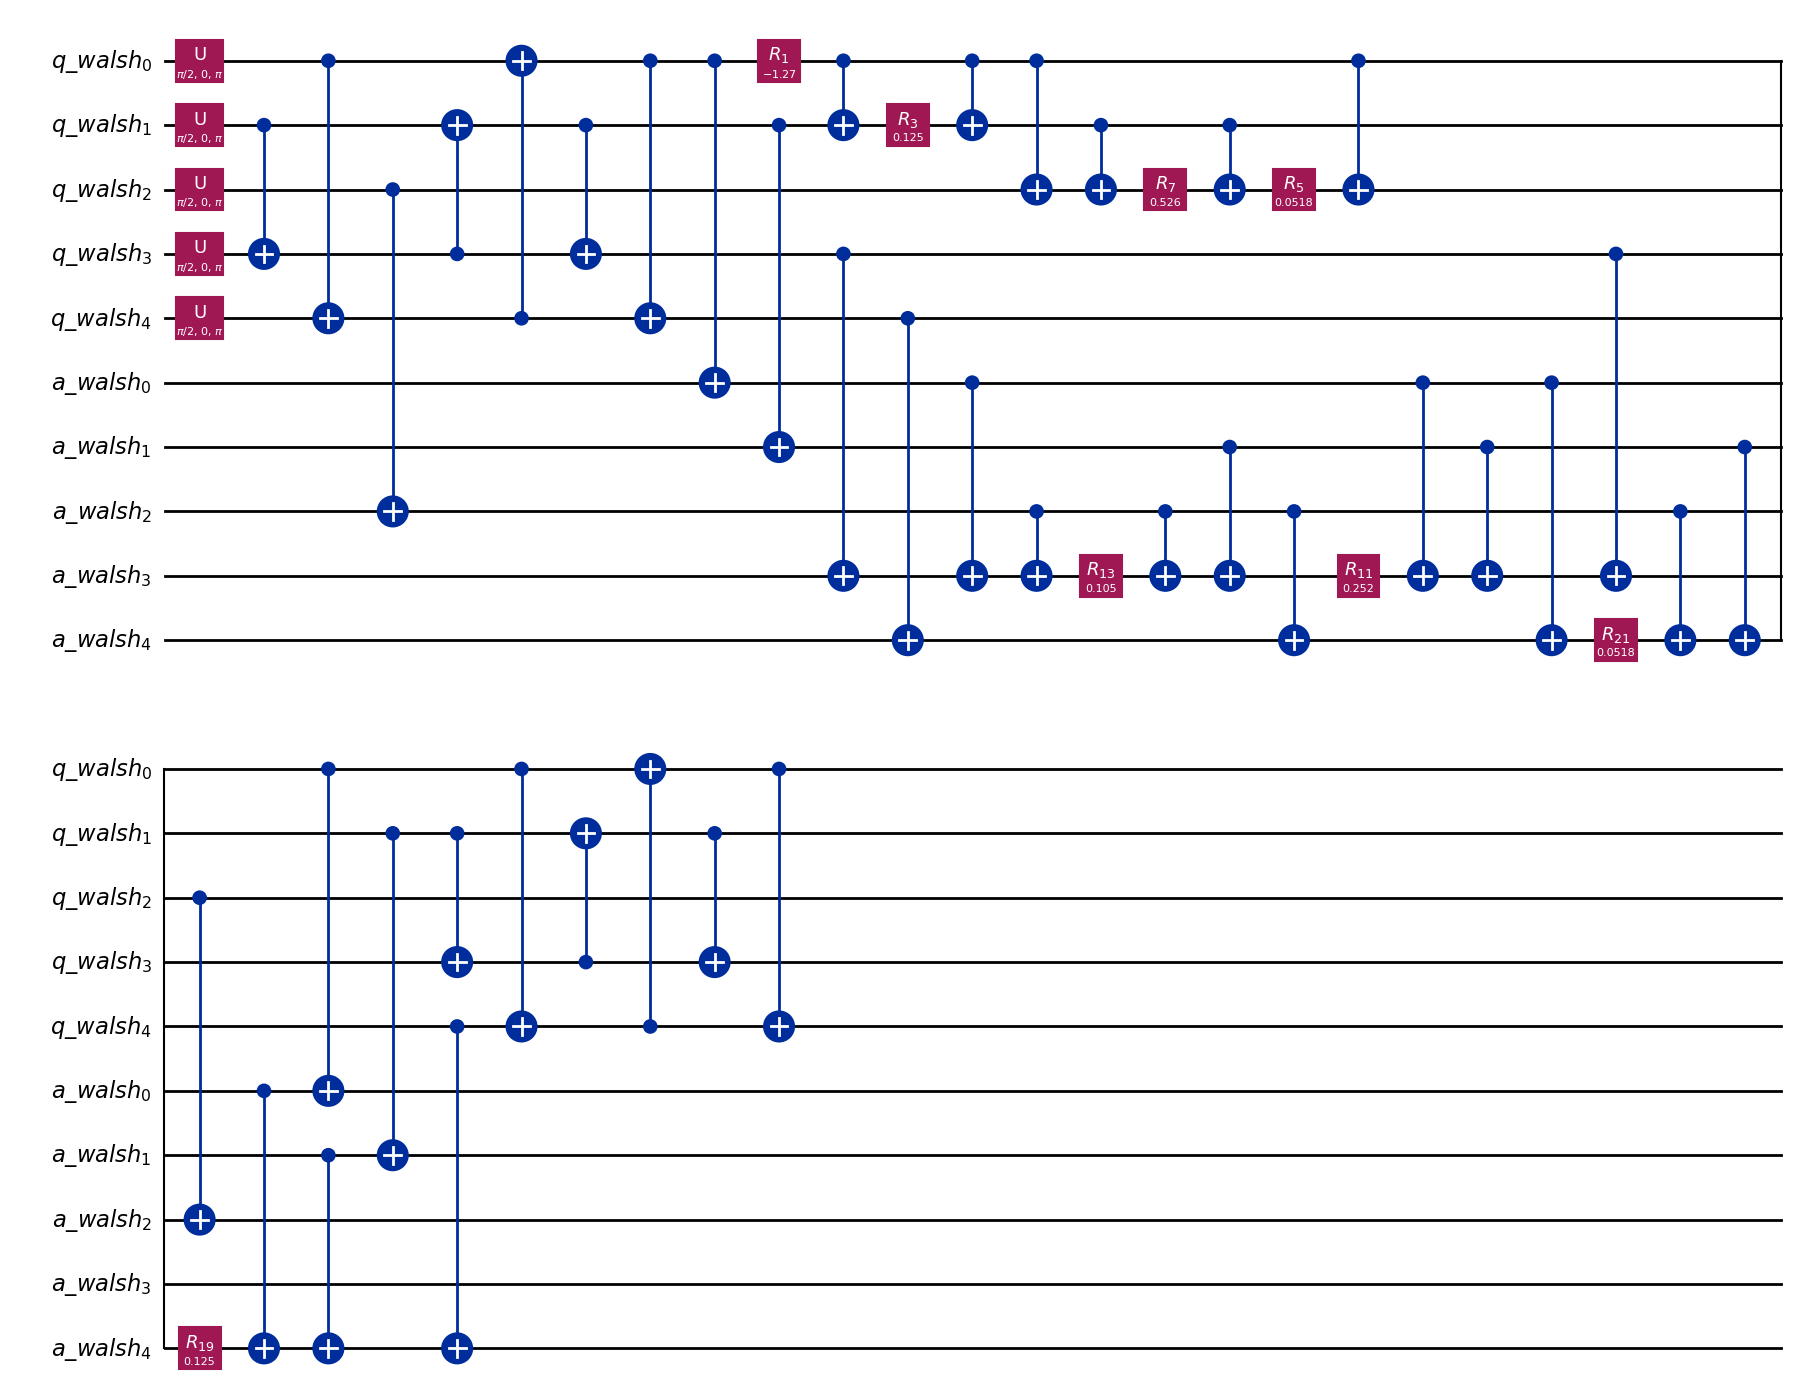

In [4]:
# We plot the circuit
qc_walsh.decompose(reps=3).draw('mpl',style='iqx')

In [5]:
# Circuit depth
print('Depth:', qc_walsh.decompose(reps=3).depth())

# Circuit size
print('Size:', qc_walsh.decompose(reps=3).size())

Depth: 23
Size: 53


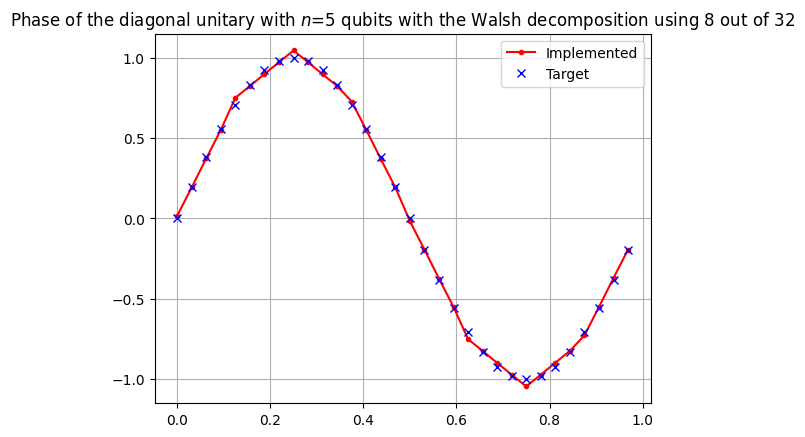

In [6]:
# Verification of the results
state = qi.Statevector.from_instruction(qc_walsh)
L = np.array(state.data[0:2**n])
L2 = np.angle(L)
X = np.array(range(2**n))/2**n
plt.plot(X,L2,marker='.',c='r',label='Implemented')
plt.plot(X,f(X),marker='x',c='b',linestyle='',label='Target')
plt.legend()
plt.title('Phase of the diagonal unitary with $n$='+str(n)+' qubits with the Walsh decomposition using '+str(n_operators)+' out of '+str(2**n))
plt.grid()
plt.show()